In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import statsmodels.api as sm

In [100]:
data = pd.read_stata('preprocessed.dta')
data.head()

,dsl,industry_code_1,industry_code_2,state_code,rural_urban_dummy,total_fixed_assets,total_current_assets,working_capital,male_days,male_no,...,sub_total_super_other_wages,sub_total_super_other_contrac_w,sub_total_days,avg_salary_male,avg_salary_female,avg_salary_contrac,avg_salary_super_manag,avg_salary_sub_total,avg_salary_other_emp,contrac_to_total
0,100001,9999,12002,1,2,1.432840e+06,9.964580e+05,1.085980e+05,0,0,...,84000.0,84000.0,0.0,NaN,NaN,NaN,NaN,NaN,84000.000,0.0000
1,100002,9999,12007,1,2,1.991278e+07,7.290834e+07,2.461183e+07,1464,5,...,560279.0,560279.0,1464.0,76055.796875,NaN,NaN,90000.00,76055.796875,90000.000,0.0000
2,100003,9999,35101,1,1,6.733088e+09,4.428999e+07,-1.553935e+07,0,0,...,383884256.0,477165312.0,0.0,NaN,NaN,217438.375,2717911.75,NaN,1631730.875,0.6953
3,100004,9999,35101,1,1,1.593169e+10,1.565548e+08,-4.824701e+08,41345,133,...,215640000.0,215640000.0,42589.0,720000.000000,720000.0,NaN,1560000.00,720000.000000,NaN,0.0000
4,100005,9999,35101,1,1,8.191335e+09,9.141474e+09,8.872823e+09,30302,97,...,124632320.0,124632320.0,30302.0,280975.187500,NaN,NaN,6212616.50,280975.187500,1141316.375,0.0000


In [101]:
# read do file
with open('preprocessing.do', 'r') as file:
    do_file = file.read()

In [102]:
print(do_file)

. use "C:/Users/suhan/Desktop/ILGC/ASI/ASI_2017-18_merged.dta"

. drop yr blk a2 a3 a8 a10 a11 a12 bonus pf welfare mwdays nwdays wdays costop expshare mult b02 b03 b04 b05 b06f b06t b07 b08 b09

. drop c_131 c_141 c_151 c_161 c_171 c_181 c_191 c_1101 c_1111 c_1121 c_1131 c_132 c_142 c_152 c_162 c_172 c_182 c_192 c_1102 c_1112 c_1122 c_1132 c_133 c_143 c_153 c_163 c_173 c_183 c_193 c_1103 c_1113 c_1123 c_1133 c_134 c_144 c_154 c_164 c_174 c_184 c_194 c_1104 c_1114 c_1124 c_1134 c_135 c_145 c_155 c_165 c_175 c_185 c_195 c_1105 c_1115 c_1125 c_1135 c_136 c_146 c_156 c_166 c_176 c_186 c_196 c_1106 c_1116 c_1126 c_1136 c_137 c_147 c_157 c_167 c_177 c_187 c_197 c_1107 c_1117 c_1127 c_1137 c_138 c_148 c_158 c_168 c_178 c_188 c_198 c_1108 c_1118 c_1128 c_1138 c_139 c_149 c_159 c_169 c_179 c_189 c_199 c_1109 c_1119 c_1129 c_1139 c_1310 c_1410 c_1510 c_1610 c_1710 c_1810 c_11010 c_11110 c_11210

. drop d131 d141 d132 d142 d133 d143 d134 d144 d135 d145 d137 d147 d138 d148 d139 d149 d1310 d1410 d

In [103]:
data.columns

Index(['dsl', 'industry_code_1', 'industry_code_2', 'state_code',
       'rural_urban_dummy', 'total_fixed_assets', 'total_current_assets',
       'working_capital', 'male_days', 'male_no', 'male_wages', 'female_days',
       'female_no', 'female_wages', 'sub_total_employees', 'contrac_days',
       'contrac_no', 'contrac_wages', 'total_workers', 'super_manag_days',
       'super_manag_no', 'super_manag_wages', 'other_employees',
       'other_emp_wages', 'total_employees', 'total_wages',
       'operating_expenses', 'r_and_d_expenses', 'total_input', 'total_output',
       'gross_value_added', 'net_value_added', 'net_income', 'profit',
       'sub_total_super_other', 'sub_total_super',
       'sub_total_super_other_contrac', 'total_expenses', 'workcap_emp_ratio',
       'lab_exp_ratio', 'female_male_ratio', 'sub_total_wages',
       'sub_total_super_wages', 'sub_total_super_other_wages',
       'sub_total_super_other_contrac_w', 'sub_total_days', 'avg_salary_male',
       'avg_salary_

In [104]:
variables_of_interest = [
    'profit', 'net_income', 'total_output', 'gross_value_added', 'sub_total_wages',
    'male_wages', 'female_wages', 'male_days', 'female_days', 'sub_total_days',
    'female_male_ratio', 'avg_salary_male', 'avg_salary_female', 'avg_salary_sub_total',
    'contrac_wages', 'super_manag_wages', 'avg_salary_super_manag',
    'super_manag_days', 'contrac_days', 'operating_expenses', 'r_and_d_expenses',
    'total_expenses', 'lab_exp_ratio', 'total_fixed_assets', 'total_current_assets',
    'contrac_to_total', 'male_no', 'female_no'
]

min_firm_size = 50
max_firm_size = 150
data = data[(data['sub_total_super_other'] >= min_firm_size) & (data['sub_total_super_other'] <= max_firm_size)]

valid_columns = [col for col in variables_of_interest if col in data.columns]
grouped_data = data.groupby('sub_total_super_other')[valid_columns].mean().reset_index()

In [118]:
def plot_averages(data, columns):
    fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 35))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.lineplot(ax=axes[i], data=data, x='sub_total_super_other', y=col)
        axes[i].axvline(x=100, color='r', linestyle='--')
        axes[i].set_title(f'Average {col} by Firm Size')
        axes[i].set_xlabel('Firm Size')
        axes[i].set_ylabel('Average Value')
        # set y ticks for 'male_no' and 'female_no' to be in order of 5
        if col == 'male_no':
            axes[i].set_yticks(np.arange(15, 100, 5))
        elif col == 'female_no':
            axes[i].set_yticks(np.arange(0, 35, 5))

    # Remove extra subplots if there are any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()

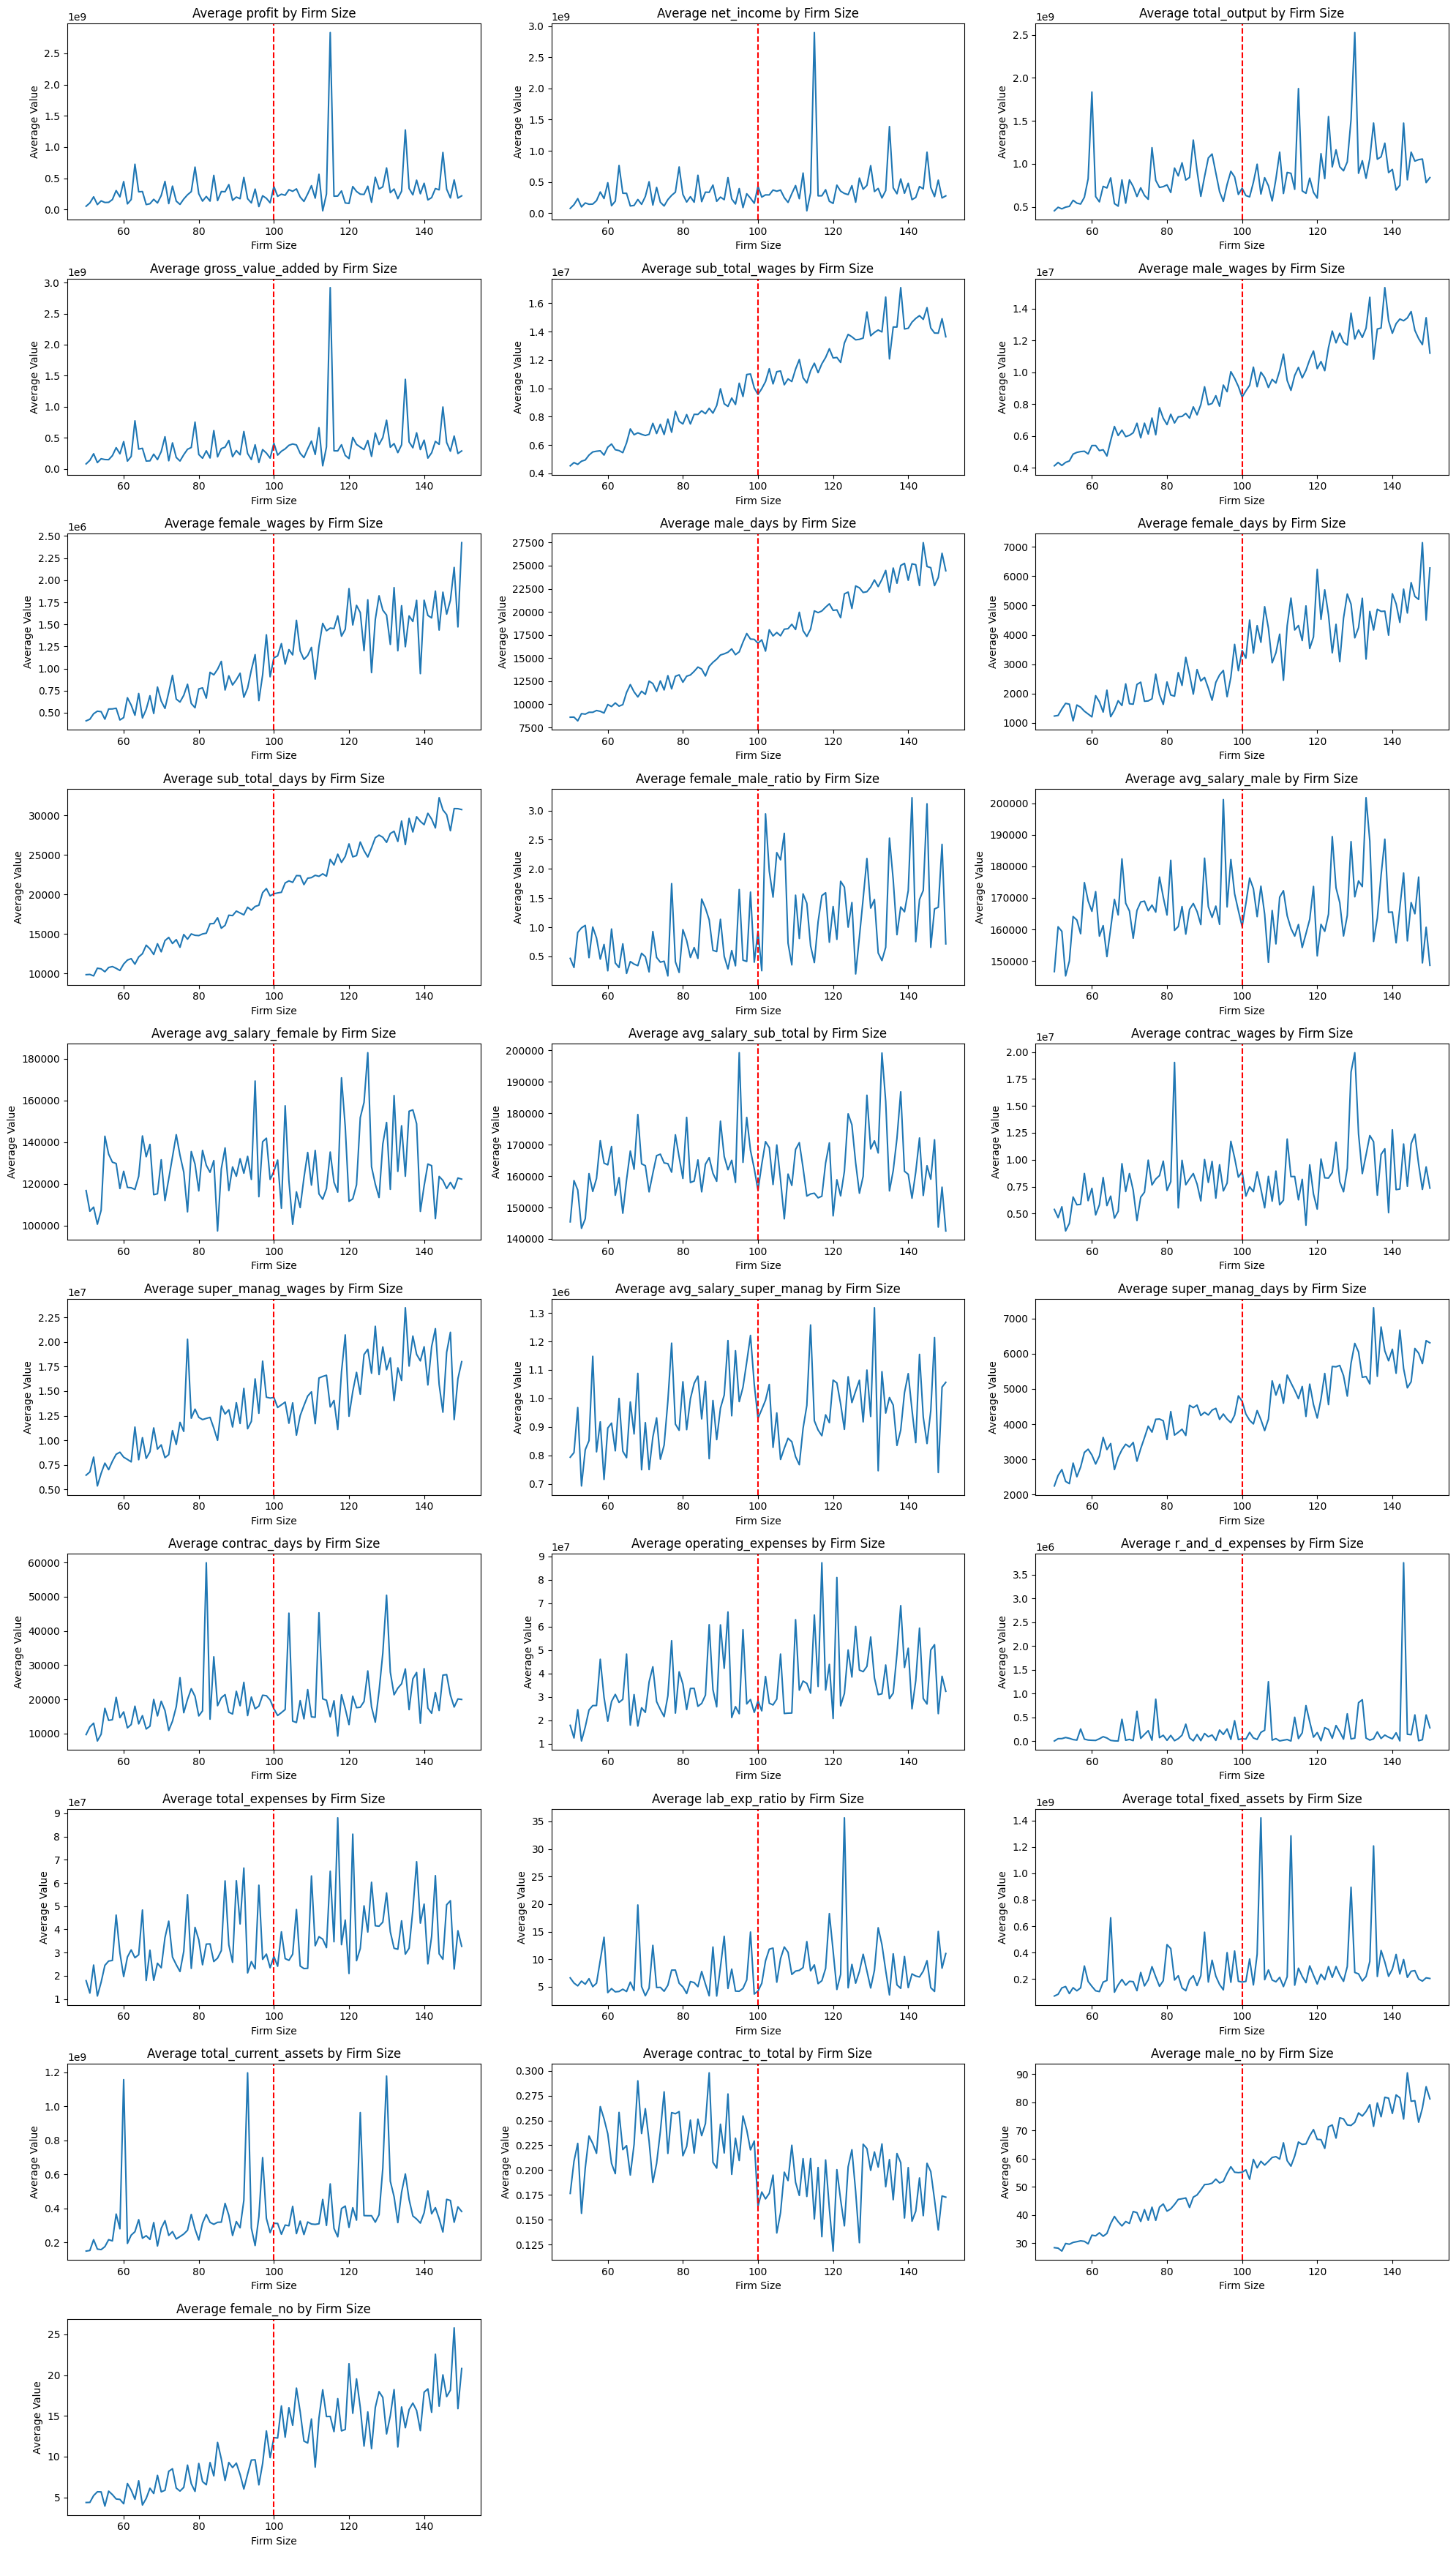

In [106]:
plot_averages(grouped_data, valid_columns)

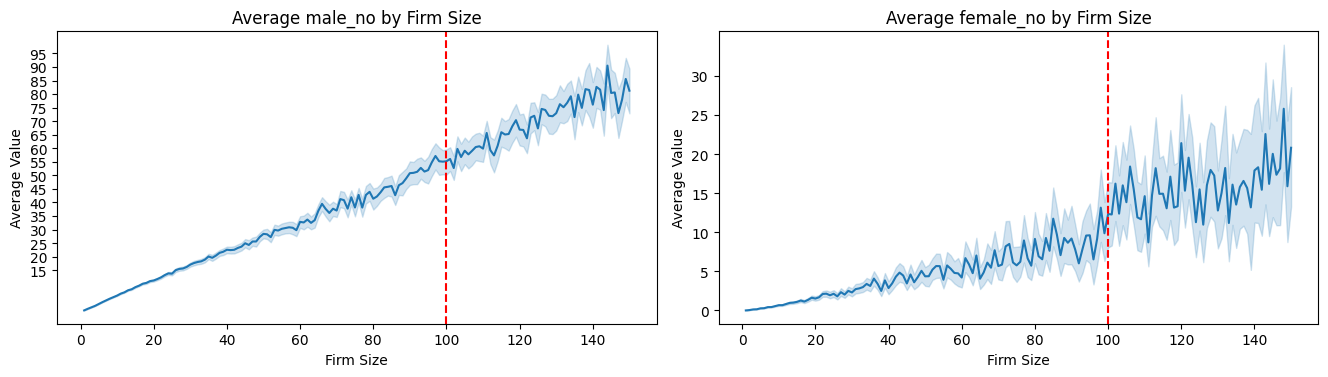

In [119]:
gend_columns = ['male_no', 'female_no']
plot_averages(data, gend_columns)

# TFP

In [107]:
necessary_vars = ['total_output', 'total_fixed_assets', 'sub_total_days', 'operating_expenses']
data[necessary_vars].describe()

,total_output,total_fixed_assets,sub_total_days,operating_expenses
count,1.019000e+04,1.194800e+04,11948.000000,1.194700e+04
mean,8.324960e+08,2.437691e+08,18537.296875,3.380563e+07
std,2.929189e+09,1.899571e+09,9653.497070,1.368026e+08
min,-2.190940e+08,0.000000e+00,0.000000,0.000000e+00
25%,1.552394e+08,1.964317e+07,11874.750000,4.170586e+06
50%,3.460606e+08,5.726746e+07,17306.000000,1.093315e+07
75%,8.092116e+08,1.582937e+08,25155.500000,2.737880e+07
max,1.931875e+11,1.240812e+11,52495.000000,6.613042e+09


In [108]:
# add 1 to avoid log(0)
data['log_total_output'] = np.log(data['total_output'] + 1)
data['log_total_fixed_assets'] = np.log(data['total_fixed_assets'] + 1)
data['log_sub_total_days'] = np.log(data['sub_total_days'] + 1)
data['log_operating_expenses'] = np.log(data['operating_expenses'] + 1)

data_filtered = data.dropna(subset=['total_output', 'total_fixed_assets', 'sub_total_days', 'operating_expenses'])
data_filtered = data_filtered[(data_filtered['total_output'] > 0) &
                              (data_filtered['total_fixed_assets'] > 0) &
                              (data_filtered['sub_total_days'] > 0) &
                              (data_filtered['operating_expenses'] > 0)]

def estimate_tfp(data):
    # first stage: estimate coefficients using only capital and labor
    X_initial = sm.add_constant(data[['log_total_fixed_assets', 'log_sub_total_days']])
    y = data['log_total_output']

    # include intermediate inputs
    X_final = sm.add_constant(data[['log_total_fixed_assets', 'log_sub_total_days', 'log_operating_expenses']])

    # final: include all inputs to account for shocks
    model_final = sm.OLS(y, X_final, missing='drop').fit()
    data['tfp'] = model_final.resid
    return model_final, data

In [109]:
model, data_filtered = estimate_tfp(data_filtered)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       log_total_output   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4558.
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        19:34:47   Log-Likelihood:                -11985.
No. Observations:                9839   AIC:                         2.398e+04
Df Residuals:                    9835   BIC:                         2.401e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

In [110]:
print(data_filtered['tfp'].describe())

count    9.839000e+03
mean     5.110939e-14
std      8.181369e-01
min     -5.927278e+00
25%     -5.078523e-01
50%     -3.621002e-02
75%      4.781362e-01
max      6.730227e+00
Name: tfp, dtype: float64


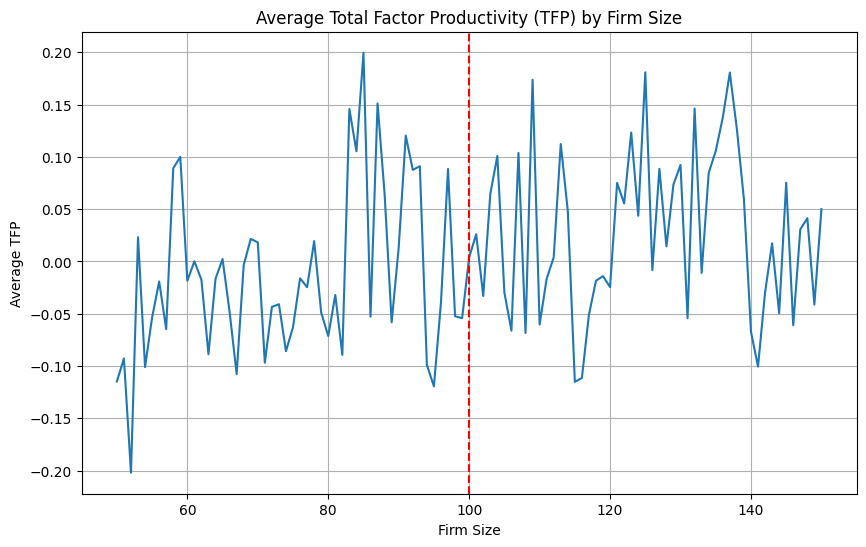

In [111]:
average_tfp_by_firm_size = data_filtered.groupby('sub_total_super_other')['tfp'].mean().reset_index()

# Plot the average TFP by firm size
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_tfp_by_firm_size, x='sub_total_super_other', y='tfp')
plt.axvline(x=100, color='r', linestyle='--')
plt.title('Average Total Factor Productivity (TFP) by Firm Size')
plt.xlabel('Firm Size')
plt.ylabel('Average TFP')
plt.grid(True)
plt.show()

In [112]:
data_filtered.to_stata('preprocessed_with_tfp.dta', write_index=False)

# Firm Size Distribution

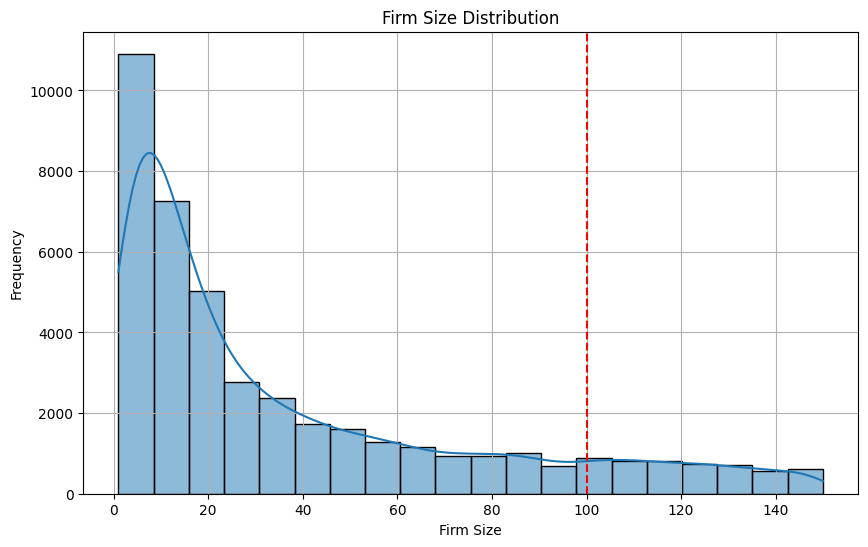

In [113]:
# firm size distribution
plt.figure(figsize=(10, 6))
data = pd.read_stata('preprocessed.dta')
data = data[(data['sub_total_super_other'] >= 1) & (data['sub_total_super_other'] <= 150)]
sns.histplot(data=data, x='sub_total_super_other', bins=20, kde=True)
plt.axvline(x=100, color='r', linestyle='--')
plt.title('Firm Size Distribution')
plt.xlabel('Firm Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [114]:
len(data.columns)

53